the target : to create a dataFrame that contains the information from the billabord charts and from spotify. the information from spotify is the id of each song that is in the billaboard chart.

We get the id of the song,which is the connection between the billabord info and the spotify info (we take each song and artist name from the billabord chart and search for the specific song id in order to get the features that we want to check on each song, in order to classify which song is a hit or not , i.e. which song is popular and which isn't (by the popularity column, which we turned from numeric to catagorial (yes/no).

In addition to getting the id - with get_id_of_songs() function, that uses other functions : get_key(val) and find_id(song,result), this function also returns the uri , the song features that we will use in the dataFrame and also info about the artist ( with find_artist_info(result) ) , which includes the 'popularity' feature , which is out target variable.  

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import requests 
import scipy.stats as stats
import datetime
import base64
clientid = '4d7f3ed374354cbf848b72bc270abedd'
secretid = '7c9935d59cbc417e8ac74ad8d7e06a6e'
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2019')
print(f'Total tables: {len(table_MN)}')
df1 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2018')
df2 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2017')
df3 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2016')
df4 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2015')
df5 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2014')
df6 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2013')
df7 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2012')
df8 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2011')
df9 = table_MN[0]
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
frames = [df1]

## todo: get more data, and really scrape this.
all_songs_list = pd.concat(frames)

Total tables: 2


In [96]:
print(all_songs_list)

    No.            Title                            Artist(s)
0     1  "Old Town Road"  Lil Nas X featuring Billy Ray Cyrus
1     2      "Sunflower"             Post Malone and Swae Lee
2     3     "Without Me"                               Halsey
3     4        "Bad Guy"                        Billie Eilish
4     5            "Wow"                          Post Malone
..  ...              ...                                  ...
95   96    "Eyes on You"                           Chase Rice
96   97  "All to Myself"                           Dan + Shay
97   98      "Boyfriend"       Ariana Grande and Social House
98   99   "Walk Me Home"                                 Pink
99  100        "Robbery"                           Juice Wrld

[100 rows x 3 columns]


In [108]:
sp.search("lsdjlk asfklfafas", limit=1,type='track')

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=lsdjlk+asfklfafas&type=track&offset=0&limit=1',
  'items': [],
  'limit': 1,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0}}

In [127]:
import re

song_results = []
for index, row in all_songs_list.iterrows():
    song_rank = row['No.']
    artist_original_name = row['Artist(s)']
    artist_names = re.split('featuring | and | ,',artist_original_name)
    artist_names.append(artist_original_name)
    for name in artist_names:
        query = "track:"+row['Title']+" artist:"+name
        query = query.replace('"','')
        search_result = sp.search(query, limit=1,type='track')
        if len(search_result['tracks']['items']) != 0:
            song_entity ={'rank':song_rank,'result':search_result}
            song_results.append(song_entity)
            break
#         song_queries.append(query)

In [98]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [99]:
cid = "3b41c863d85746899b1bd17a39149f8e"
secret = "631b736a77d545e4a822bea470435cea"

In [100]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#### get the artist/band name , in order to search for the song title in the find_id() function

In [21]:
songs={'Alice in Chains':'Them Bones','Beyonce':'Crazy In Love (feat. Jay-Z)','Glass Animals':'Heat Waves','Ed Sheeran':'The Joker And The Queen (feat. Taylor Swift)'}
song_names=songs.values()
artists_names=songs.keys()
song_names_list=list(song_names)

In [22]:
def get_key(val):
    for key, value in songs.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [23]:
#finding the id of the specific song with the song name and a dictionary that contains the artists info
def find_id(song,result):
    for data in result['tracks']['items']:
        for key,value in data.items():
            if (key=='name')&  (value==song):
                print(data['id'])
                print(data['uri'])
                print(sp.audio_features(data['uri'])[0])
                print(sp.artist(find_artist_info(result)))
                return 
               

In [24]:
# so we will get an additinal info about the artist and the song - genre , popularity and etc.
def find_artist_info(result):
    for data in result['tracks']['items']:
        for key,value in data.items():
                if (key=='artists'): 
                      return (value[0]['id'])  


In [8]:
#find_artist_info(result)

In [128]:
def get_song_features(song_entity):
    search_result = song_entity['result']
    track_uri = search_result['tracks']['items'][0]['uri']
    track_features = sp.audio_features(track_uri)[0]
    artist_id = search_result['tracks']['items'][0]['artists'][0]['id']
    artist_info = sp.artist(artist_id)
    artist_popularity = artist_info['popularity']
    artist_genre = artist_info['genres'][0]
    
    features = track_features
    features['genre'] = artist_genre
    features['pop'] = artist_popularity
    features['rank'] = song_entity['rank']

    return features

In [132]:
# constant1 = "track:Overshadows artist:Shredhead"
# get_song_features(constant1)

def get_songs_df(song_entities):
    song_list = []
    for ent in song_entities:
        try:
            song_features = get_song_features(ent)
            song_list.append(song_features)
        except:
            print(ent['result'])
            print("song was not found!")
    
    return pd.DataFrame(song_list)

In [172]:
songs_df = get_songs_df(song_results)

In [173]:
def replace_genre(genre,song,index,songs_df):
    if genre in song['genre']:
        song['genre'] = genre
        songs_df.iloc[index] = song

In [174]:

for index, song in songs_df.iterrows():
    replace_genre("hip hop",song,index,songs_df)
    replace_genre("rap",song,index,songs_df)
    replace_genre("pop",song,index,songs_df)
    replace_genre("rock",song,index,songs_df)
    replace_genre("country",song,index,songs_df)


In [177]:
songs_df = songs_df.replace({'genre': {"album rock": "rock", "glam rock": "rock", "dance rock":"rock", "art rock":"rock",
                                  "soft rock":"rock", "country rock": "rock", "classic rock":"rock", "blues rock":"rock", "celtic rock":"rock",
                                  "australian rock":"rock", "german alternative rock":"rock", "alternative rock":"rock", "dance pop":"pop",
                                "brill building pop": "pop", "europop": "pop", "barbadian pop": "pop", "classic uk pop":"pop", 
                                "new wave pop":"pop", "canadian pop":"pop", "art pop":"pop", "belgian pop": "pop", "britpop": "pop", 
                                "italian pop":"pop", "classic danish pop": "pop", "bow pop": "pop", "baroque pop": "pop", "bubblegum pop": "pop",
                                "afropop":"pop", "hip pop":"pop", "atl hip hop": "hip hop", "east coast hip hop": "hip hop", "detroit hip hop":"hip hop", 
                                "bronx hip hop": "hip hop", "bubblegum dance": "dance", "eurodance":"dance", "belgian dance":"dance", "german dance": "dance",
                                "classic soul": "soul", "british soul": "soul", "chicago soul": "soul", "british folk": "folk", "american folk revival":"folk",
                                "drone folk":"folk","canadian folk":"folk", "deep adult standards":"adult standards", "glam metal": "metal", "alternative metal": "metal",
                                "acoustic blues":"blues", "british blues":"blues", "louisiana blues":"blues", "g funk":"funk", "brit funk":"funk",
                                "afrobeat":"dance", "british invasion":"rock", "doo-wop":"blues", "boy band":"pop", "merseybeat":"rock-and-roll", "blue":"blues",
                                                "bebop":"jazz", "avant-garde jazz":"jazz", "boogaloo": "latin", "big room": "trance", "bubble trance":"trance", "glam punk":"rock",
                                                "australian talent show":"pop", "mellow gold":"rock", "hi-nrg": "dance", "neo mellow": "pop", "yodeling":"folk", "classic girl group":"pop",
                                                "british dance band":"jazz", "deep house":"dance", "uk garage": "dance", "chicago rap":"hip hop",
                                     "lgbtq+ hip hop":"hip hop", "dfw rap": "hip hop", "contemporary country":"country"}})

In [178]:
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,pop,rank
0,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,...,audio_features,2YpeDb67231RjR0MgVLzsG,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,hip hop,90,1
1,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,...,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,rap,91,2
2,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,...,audio_features,5p7ujcrUXASCNwRaWNHR1C,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4,pop,87,3
3,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,...,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,pop,92,4
4,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,...,audio_features,7xQAfvXzm3AkraOtGPWIZg,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,rap,91,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.638,0.717,2,-4.722,1,0.0337,0.3460,0.000000,0.1050,0.249,...,audio_features,4VUwkH455At9kENOfzTqmF,spotify:track:4VUwkH455At9kENOfzTqmF,https://api.spotify.com/v1/tracks/4VUwkH455At9...,https://api.spotify.com/v1/audio-analysis/4VUw...,180000,4,pop,78,95
95,0.606,0.652,9,-6.982,1,0.0281,0.3230,0.000000,0.2010,0.476,...,audio_features,5AnSllIrgGsCZzZJkVnApx,spotify:track:5AnSllIrgGsCZzZJkVnApx,https://api.spotify.com/v1/tracks/5AnSllIrgGsC...,https://api.spotify.com/v1/audio-analysis/5AnS...,182493,4,country,67,96
96,0.646,0.781,1,-4.616,1,0.0313,0.2080,0.000000,0.1250,0.565,...,audio_features,08tq1XcHwVt5PHXUo87i0D,spotify:track:08tq1XcHwVt5PHXUo87i0D,https://api.spotify.com/v1/tracks/08tq1XcHwVt5...,https://api.spotify.com/v1/audio-analysis/08tq...,169920,4,country,78,97
97,0.400,0.795,10,-3.731,0,0.4610,0.1190,0.000000,0.1590,0.702,...,audio_features,0Ryd8975WihbObpp5cPW1t,spotify:track:0Ryd8975WihbObpp5cPW1t,https://api.spotify.com/v1/tracks/0Ryd8975Wihb...,https://api.spotify.com/v1/audio-analysis/0Ryd...,186107,4,pop,93,98


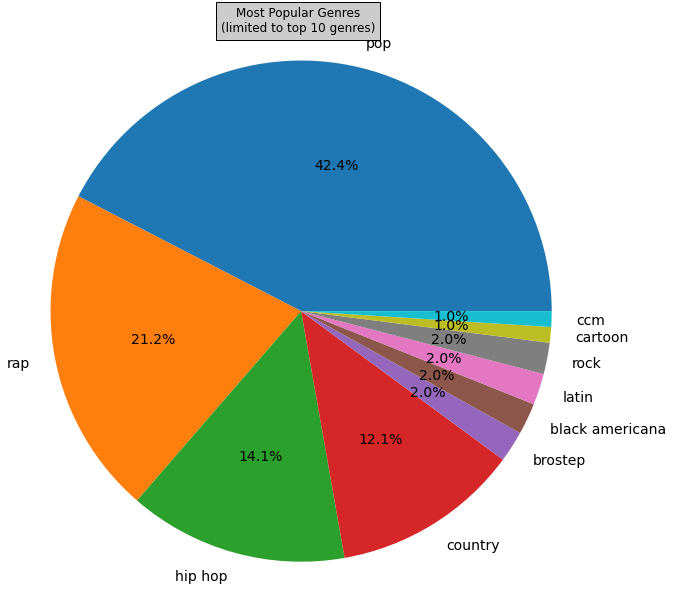

In [179]:
df_genre = songs_df['genre'].value_counts()[:20].sort_values(ascending=False) / len(songs_df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.title("Most Popular Genres\n" + "(limited to top 10 genres)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [78]:
def get_id_of_songs():

    # for song in song_names_list:

    for song in song_names_list:
        result = sp.search(get_key(song), limit=10)
     #   print(result)
        print("\n")
        find_id(song,result)



In [28]:
get_id_of_songs()

shit fuck: Alice in Chains


4A065x9kJt955eGVqf813g
spotify:track:4A065x9kJt955eGVqf813g
{'danceability': 0.159, 'energy': 0.946, 'key': 9, 'loudness': -5.756, 'mode': 1, 'speechiness': 0.0629, 'acousticness': 0.0235, 'instrumentalness': 8.06e-06, 'liveness': 0.387, 'valence': 0.309, 'tempo': 165.014, 'type': 'audio_features', 'id': '4A065x9kJt955eGVqf813g', 'uri': 'spotify:track:4A065x9kJt955eGVqf813g', 'track_href': 'https://api.spotify.com/v1/tracks/4A065x9kJt955eGVqf813g', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4A065x9kJt955eGVqf813g', 'duration_ms': 149467, 'time_signature': 1}
{'external_urls': {'spotify': 'https://open.spotify.com/artist/64tNsm6TnZe2zpcMVMOoHL'}, 'followers': {'href': None, 'total': 3784843}, 'genres': ['alternative metal', 'alternative rock', 'grunge', 'hard rock', 'nu metal', 'rock'], 'href': 'https://api.spotify.com/v1/artists/64tNsm6TnZe2zpcMVMOoHL', 'id': '64tNsm6TnZe2zpcMVMOoHL', 'images': [{'height': 640, 'url': 'https://i.scdn.co/imag

# טיוטות

In [11]:
# for artist in artists_names:
#     art=sp.search(artist)

In [12]:
#art

In [13]:
#art['tracks']['items']

In [14]:
#art['tracks']['items'][0]

In [15]:
#art['tracks']['items']

In [16]:
# #finding the id of the specific song with the song name and a dictionary that contains the artists info
# def find_id2(song,result):
#     for data in result['tracks']['items']:
#         for key,value in data.items():
#             if (key=='name')&  (value==song):
#                 print(data['id'])
#                 print(data['uri'])
#                 print(sp.audio_features(data['uri'])[0])
#                 print(sp.artist("64tNsm6TnZe2zpcMVMOoHL"))
#                 return 
               

In [17]:

# find_id2('Them Bones',result)

NameError: name 'result' is not defined

In [ ]:
#  print(sp.artist(find_artist_id()))

In [ ]:

#  artists_names=songs.keys()
# def find_artist_id():
#         for key,value in art['tracks']['items'][0]['artists'][0].items():
#             if(key=='id'):
#                 print(value)
                   

In [ ]:
# def find_features(song,result):
#     for song in song_names_list:
#         result = sp.search(get_key(song), limit=10)
#         for data in result['tracks']['items']:
#             print(sp.audio_features("spotify:track:4A065x9kJt955eGVqf813g")[0])
#sp.artist("spotify:artist:6eUKZXaKkcviH0Ku9w2n3V")


In [ ]:
# get_id_of_songs()

In [ ]:
# art=sp.search(artist)

## כל מה שלמטה זה טיוטה

In [ ]:
# tracks = []

# playlist_link ="spotify:track:4A065x9kJt955eGVqf813g"
# #playlist_URI = playlist_link.split("/")[-1].split("?")[0]
# track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

# track_uri = track["track"]["uri"]

# #Track name
# track_name = track["track"]["name"]
    
# #Main Artist
# artist_uri = track["track"]["artists"][0]["uri"]
# artist_info = sp.artist(artist_uri)

# #Name, popularity, genre
# artist_name = track["track"]["artists"][0]["name"]
# artist_pop = artist_info["popularity"]
# artist_genres = artist_info["genres"]

# #Album
# album = track["track"]["album"]["name"]

# #Popularity of the track
# track_pop = track["track"]["popularity"]

# track_features = sp.audio_features(track_uri)[0]

# track_genre = 'None'
# if len(artist_genres)>0:
#     track_genre = artist_genres[0]

# track_features['genre'] = track_genre
# track_features['pop'] = track_pop
# track_features['name'] = track_name
# track_features['artist'] = artist_name
# tracks.append(track_features)

In [ ]:
# def find_artist_id0():
#     for song in song_names_list:
#         for data in art['tracks']['items']:
#             for key,value in data.items():
              
#                 if ((key=='uri') & (str(value).contains('a'))) :
#                     print(str(value))
#                     print (data['uri'])
#                     print('dgft')
#                     return
#                     #print(data['uri'])
        

In [ ]:
  #  print(result)
# for track in song_names_list:
#     #print(song_names_list[track])
#     if(track==result['tracks']['items'][0]['name']):
#         print(result['tracks']['items'][0]['name'])
# for item in a_dict.items():
# ...     print(item)

In [ ]:
# song_names_list

In [ ]:
# data.items()

In [ ]:
# result['tracks']

In [ ]:
# for data in result['tracks']['items']:
#     for key,value in data.items():
#         if (key=='name')&  (value==song_names_list[0]):
#             print(value)

In [ ]:
# result = sp.search(songs, type='track')

In [ ]:
# data.items()

In [ ]:
# song_names_list

In [ ]:
# result

In [ ]:
#result['tracks']['items'] - a list of dicts

In [ ]:
# result['tracks']['items']

In [ ]:
#print(result['tracks']['items'])

In [ ]:
# for data in result['tracks']['items']:
#     for key,value in data.items():
#         if (key=='name')&  (value==song_names_list[0]):
#             print(value)

In [ ]:
# for data in result['tracks']['items']:
#      for key in data:
#             if key=='name'& (value==song_names_list[0]):
#                 print(value)
   

In [ ]:
# for data in result['tracks']['items']:
#      for key in data.keys():
#             if key=='name':
#                 print(key)
   

In [ ]:
# for data in result['tracks']['items']:
#     print (data)